<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/master/Session1/Assignment1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1A

---



The assignment is to find and show (in separate code blocks):

> Horizontal Edge Detector

> 45 Degree Angle Detector (either)

> Blur Kernel

> Sharpen Kernel

> Identity function (doesn't do anything)




#### Reference code provided for Assignment

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

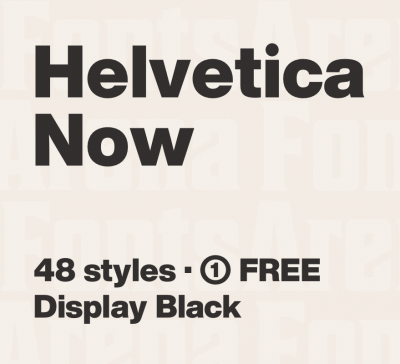

In [119]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")
cv2_imshow(image)

##### Below is the sample code provided for vertical edge detector

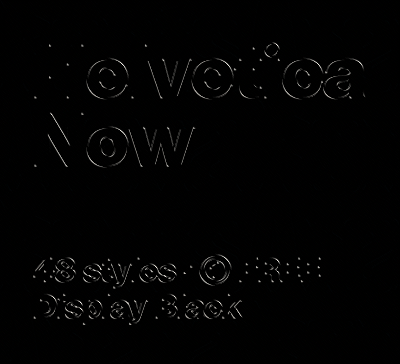

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

Ok, Now wanted to try a different kernel to detect vertical lines so here i go..

By applying the vertical edge detector kernel 
 [[-1.  1.  0.]
 [-1.  1.  0.]
 [-1.  1.  0.]], 
 resultant image:


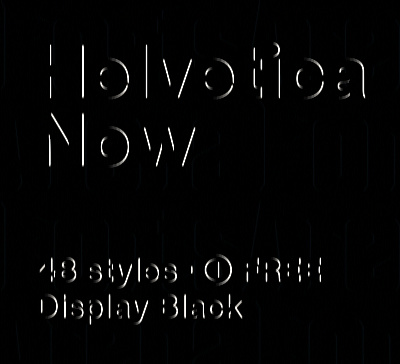

In [99]:
kernel = np.float32([[-1,1,0],[-1,1,0],[-1,1,0]])
print("By applying the vertical edge detector kernel \n {}, \n resultant image:".format(kernel))

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

Ok, This also returns vertical lines.. Even the vertical line in H is detected.. Yayyyyy!


### Horizontal Edge detector

For Horizontal edge detector, let us inverse the values of the above kernel

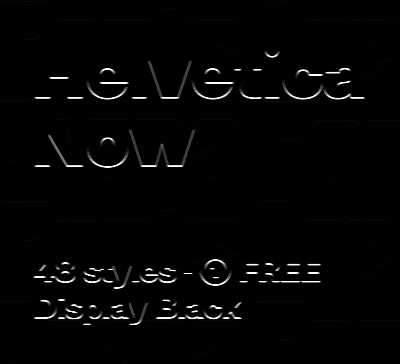

In [7]:
kernel = np.float32([[-1,-1,-1],[1,1,1],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

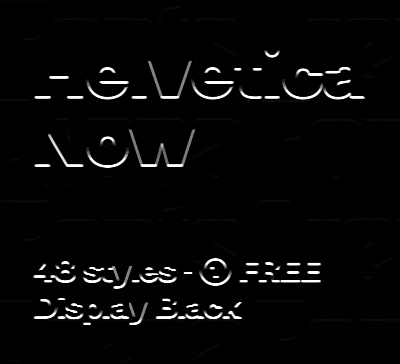

In [8]:
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

### 45 Degree detector

For 45 degree detector, Shall we keep kernel diagonal values as such and if we  remove the neighbouring pixels, lets see what happens

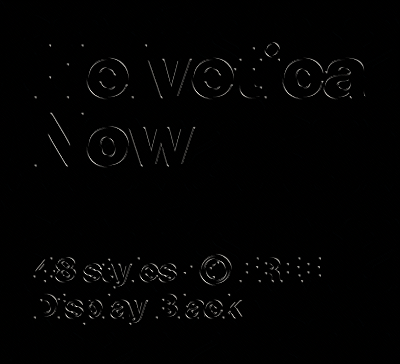

In [30]:
kernel = np.float32([[1,-1,0],[0,1,-1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

[[-1.  0.  1.]
 [ 0.  1. -1.]
 [ 1. -1.  0.]]


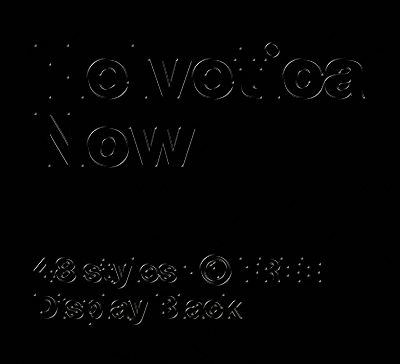

In [93]:
#What happens when the other diagonal line pixels are kept

kernel = np.float32([[-1,0,1],[0,1,-1],[1,-1,0]])
print(kernel)
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

Both the kernels, output seems same..

### Blur Kernel
By just taking some information from neighboring pixels, the resultant image is blurred.

[[ 0.5 -0.5  0.5]
 [-0.5  0.5 -0.5]
 [ 0.5 -0.5  0.5]]


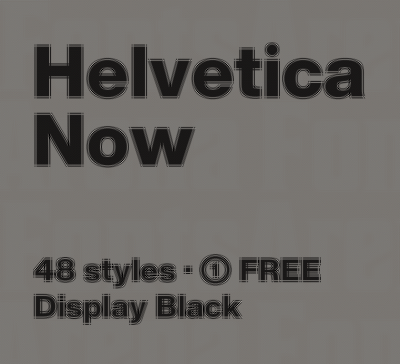

In [85]:
kernel = np.float32([[0.5,-0.5,0.5],[-0.5,0.5,-0.5],[0.5,-0.5,0.5]])

print(kernel)
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

###Sharpen Kernel
Let us try taking only the center pixel, and symmetrcally neighbour pixels and removed the other noise from the image

[[-1.  1. -1.]
 [ 1.  1.  1.]
 [-1.  1. -1.]]


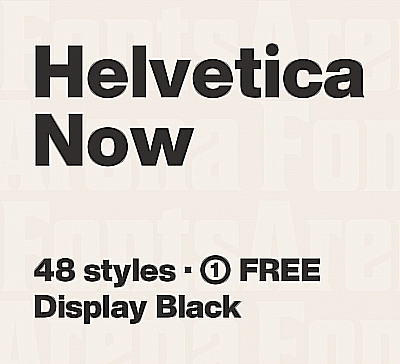

In [89]:
kernel = np.float32([[-1,1,-1],[1,1,1],[-1,1,-1]])

print(kernel)
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

Yup, the image looks sharpened.. :) And now comes the identity function.. 
### Identity Function

When we apply 3x3, the image is convolved. But we need to retain the original image as such, so we need to increase the dimension by 2 pixels in the border.


(364, 400, 3)
(366, 402, 3)


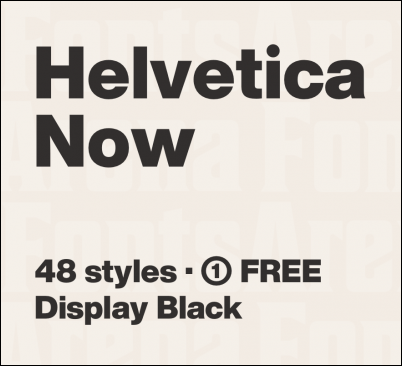

In [120]:
#print(image
print(image.shape)
#image = cv2.copyMakeBorder( image, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value= white)
#image = np.pad(image, pad_width=1, mode='constant', constant_values=0)
image = np.pad(image, pad_width=((1,1), (1,1), (0,0)), mode='constant', constant_values=0)
print(image.shape)
cv2_imshow(image)

[[-1.  1. -1.]
 [ 1.  1.  1.]
 [-1.  1. -1.]]


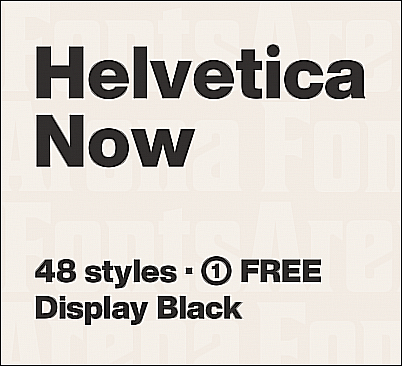

In [122]:
#kernel = np.ones((365,400,3))
kernel = np.float32([[-1,1,-1],[1,1,1],[-1,1,-1]])

print(kernel)
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

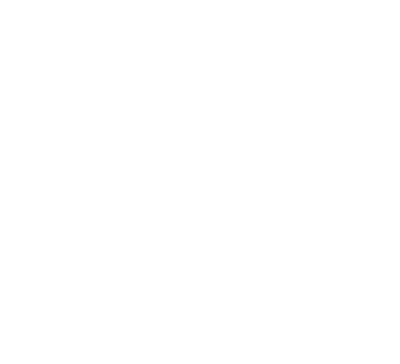

In [108]:
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)